In [35]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [2]:
import networkx as nx
import pandas as pd
%matplotlib inline

# Basic Network Concepts

## Basic Vocabulary

In [3]:
net1 = nx.Graph()

In [4]:
net1.add_node("Alice")
net1.add_node("Bob")
net1.add_node("Chuck")

In [5]:
net1.add_edge("Alice", "Bob")
net1.add_edge("Bob", "Chuck")

In [6]:
net1.nodes()

NodeView(('Alice', 'Bob', 'Chuck'))

In [7]:
list(net1.edges())

[('Alice', 'Bob'), ('Bob', 'Chuck')]

In [8]:
net1.add_edge("Alice", "Chuck")

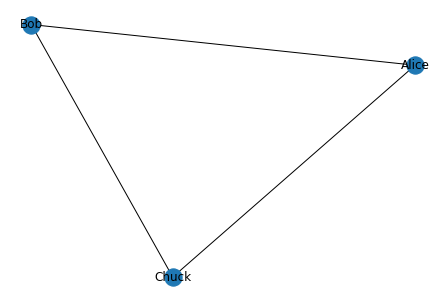

In [9]:
nx.draw(net1, with_labels=True)

## Edges

In [10]:
net2 = nx.DiGraph()

In [11]:
net2.add_node("Alice")
net2.add_node("Bob")
net2.add_node("Chuck")

In [12]:
net2.add_edge("Alice", "Bob")
net2.add_edge("Bob", "Chuck")

In [13]:
net2.edges()

OutEdgeView([('Alice', 'Bob'), ('Bob', 'Chuck')])

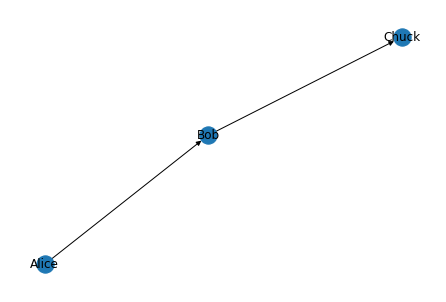

In [14]:
nx.draw(net2, with_labels=True)

## Edge Weights

In [15]:
net3 = nx.Graph()

In [16]:
net3.add_node("Alice")
net3.add_node("Bob")
net3.add_node("Chuck")

In [17]:
net3.add_edge("Alice", "Bob", weight=2, since=3)
net3.add_edge("Bob", "Chuck", weight=1, since=1)

In [18]:
net3.edges()

EdgeView([('Alice', 'Bob'), ('Bob', 'Chuck')])

In [19]:
net3.edges(data=True)

EdgeDataView([('Alice', 'Bob', {'weight': 2, 'since': 3}), ('Bob', 'Chuck', {'weight': 1, 'since': 1})])

## Apollo 13 Movie Network

In [20]:
appolo = nx.Graph()

In [21]:
appolo.add_node("Tom Hanks")
appolo.add_node("Bill Paxton")
appolo.add_node("Gary Sinise")
appolo.add_node("Ed Harris")
appolo.add_node("Kevin Bacon")

In [22]:
appolo.add_edge("Tom Hanks", "Bill Paxton", movies = ["Magnificent Desolation: Walking on the Moon"])
appolo.add_edge("Tom Hanks", "Gary Sinise", movies = ["The Green Mile"])
appolo.add_edge("Bill Paxton", "Gary Sinise", movies = ["Magnificent Desolation: Walking on the Moon"])
appolo.add_edge("Gary Sinise", "Kevin Bacon", movies = ["Beyond All Boundaries"])
appolo.add_edge("Gary Sinise", "Ed Harris", movies = ["The Human Stain"])

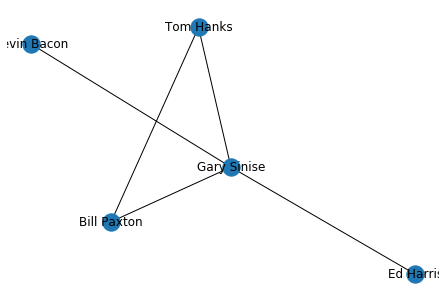

In [23]:
nx.draw(appolo, with_labels = True)

## Neighbors

In [24]:
list(appolo.neighbors('Tom Hanks'))

['Bill Paxton', 'Gary Sinise']

## Adjacency Matrix

In [25]:
nx.adj_matrix(appolo).todense()

matrix([[0, 1, 1, 0, 0],
        [1, 0, 1, 0, 0],
        [1, 1, 0, 1, 1],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0]], dtype=int32)

In [26]:
appolo.nodes()

NodeView(('Tom Hanks', 'Bill Paxton', 'Gary Sinise', 'Ed Harris', 'Kevin Bacon'))

In [27]:
appolo.edges()

EdgeView([('Tom Hanks', 'Bill Paxton'), ('Tom Hanks', 'Gary Sinise'), ('Bill Paxton', 'Gary Sinise'), ('Gary Sinise', 'Kevin Bacon'), ('Gary Sinise', 'Ed Harris')])

## Cliques

In [28]:
nx.cliques_containing_node(appolo)

{'Tom Hanks': [['Gary Sinise', 'Tom Hanks', 'Bill Paxton']],
 'Bill Paxton': [['Gary Sinise', 'Tom Hanks', 'Bill Paxton']],
 'Gary Sinise': [['Gary Sinise', 'Ed Harris'],
  ['Gary Sinise', 'Tom Hanks', 'Bill Paxton'],
  ['Gary Sinise', 'Kevin Bacon']],
 'Ed Harris': [['Gary Sinise', 'Ed Harris']],
 'Kevin Bacon': [['Gary Sinise', 'Kevin Bacon']]}

## Connectedness

In [29]:
nx.shortest_path(appolo, "Tom Hanks", "Kevin Bacon")

['Tom Hanks', 'Gary Sinise', 'Kevin Bacon']

In [30]:
appolo.add_node("Hani Safadi")

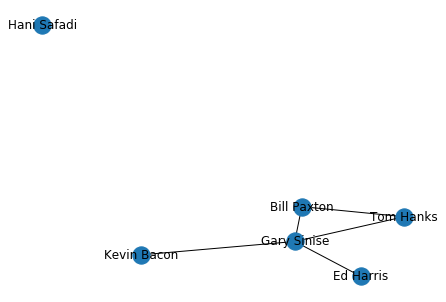

In [31]:
nx.draw(appolo, with_labels = True)

In [32]:
nx.shortest_path(appolo, "Tom Hanks", "Hani Safadi")

NetworkXNoPath: No path between Tom Hanks and Hani Safadi.

In [33]:
try:
    nx.shortest_path(appolo, "Tom Hanks", "Hani Safadi")
except:
    print("No path exists")

No path exists
